In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

In [2]:
# Kích thước ảnh
IMG_SIZE = 1280

# Đường dẫn thư mục dữ liệu
train_dir = "DataTranning"

# Sử dụng ImageDataGenerator để đọc và tiền xử lý ảnh
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Chia 80% train, 20% validation

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=8,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=8,
    class_mode='binary',
    subset='validation'
)

# Khởi tạo mô hình Sequential
model = Sequential()

# Các lớp Conv2D với kernel nhỏ hơn
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(1280, 1280, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))  # Giảm kích thước còn 640x640

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # Giảm kích thước còn 320x320

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # Giảm kích thước còn 160x160

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # Giảm kích thước còn 80x80

model.add(Dropout(0.4))

model.add(Flatten())

# Lớp Fully connected
model.add(Dense(128, activation='relu'))
model.add(Dense(36, activation='softmax'))  # Giả sử bạn có 36 lớp phân loại


# Biên dịch mô hình
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

# Kiểm tra kiến trúc mô hình
model.summary()

# Biên dịch mô hình
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50
)

# Lưu mô hình sau khi huấn luyện
model.save("model1.h5")

print("Huấn luyện hoàn tất! Mô hình đã được lưu.")

Found 14 images belonging to 2 classes.
Found 3 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1280, 1280, 16)    448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 640, 640, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 640, 640, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 320, 320, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 320, 320, 64)      18496     
                                           

In [3]:
import RS304MD
import time

thoigiandichuyen = 100
rs = RS304MD.Rs()
ID=2

def mocongCOM():
    rs.open_port('COM6', 115200, 1)
    print('Kết nối COM6 thành công!')
    rs.torque_on(ID, 1)
    print('Enable Force Successfull!')
    
def dongcongCOM():
    rs.close_port()
    print('Hủy kết nối COM6 thành công!')
    rs.torque_on(ID, 0)
    print('Disnable Force Successfull!')
    
def chayrobot(gocdichuyen):
    print('Di chuyển đến góc ',gocdichuyen, ' độ')
    rs.target_position(ID, gocdichuyen * 10, thoigiandichuyen)

Generated the serial object


1/1 [==============================] - 0s 271ms/step


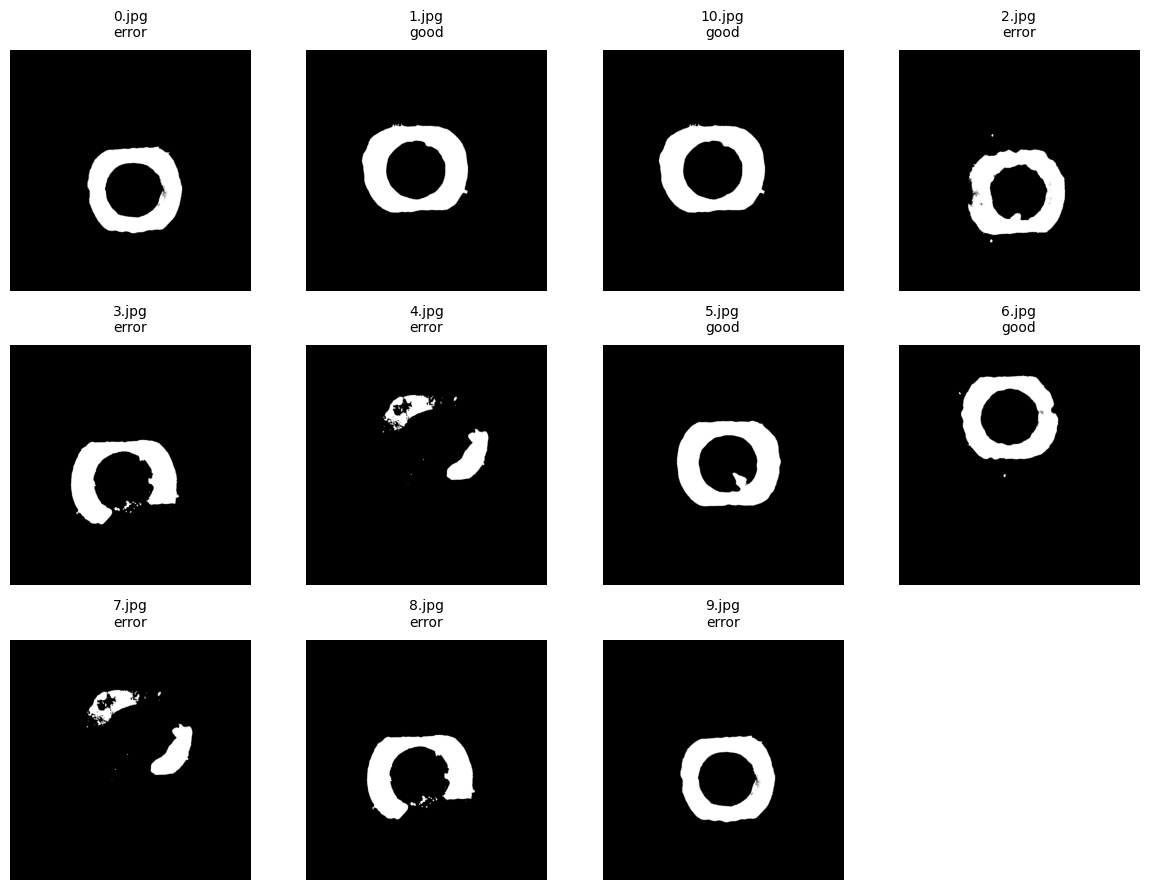

In [4]:
# Kích thước ảnh giống khi training
IMG_SIZE = 1280
model_path = "model1.h5"
data_test_path = "DataTest"

# Tải mô hình đã huấn luyện
model = tf.keras.models.load_model(model_path)

# Hàm dự đoán ảnh
def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    return "good" if prediction[0][0] < 0.4 else "error"

# Lấy danh sách ảnh trong thư mục DataTest
image_files = [f for f in os.listdir(data_test_path) if f.endswith((".jpg", ".png"))]

# Thiết lập số hàng và cột
num_images = len(image_files)
cols = 4  # Số cột hiển thị
rows = (num_images // cols) + (num_images % cols > 0)

# Tạo figure với khoảng cách rộng hơn
plt.figure(figsize=(cols * 3, rows * 3))

for i, filename in enumerate(image_files):
    file_path = os.path.join(data_test_path, filename)
    result = predict_image(file_path)

    # Đọc ảnh và chuyển sang RGB
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Hiển thị ảnh
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.axis("off")
    
    # Sửa tiêu đề để tên ảnh không bị cắt
    plt.title(f"{filename}\n{result}", fontsize=10, rotation=0, pad=10)  # Giảm font & thêm khoảng cách
    
plt.tight_layout()  # Căn chỉnh để không bị chồng chữ
plt.show()

1/1 [==============================] - 1s 617ms/step
Mở cổng COM
Robot chạy tới góc 0
Robot chạy tới góc -90
Robot chạy tới góc 0
1/1 [==============================] - 0s 267ms/step
Mở cổng COM
Robot chạy tới góc 0
Robot chạy tới góc 90
Robot chạy tới góc 0
1/1 [==============================] - 0s 292ms/step
Mở cổng COM
Robot chạy tới góc 0
Robot chạy tới góc 90
Robot chạy tới góc 0
1/1 [==============================] - 0s 421ms/step
Mở cổng COM
Robot chạy tới góc 0
Robot chạy tới góc -90
Robot chạy tới góc 0
1/1 [==============================] - 0s 260ms/step
Mở cổng COM
Robot chạy tới góc 0
Robot chạy tới góc -90
Robot chạy tới góc 0
1/1 [==============================] - 0s 264ms/step
Mở cổng COM
Robot chạy tới góc 0
Robot chạy tới góc -90
Robot chạy tới góc 0
1/1 [==============================] - 0s 357ms/step
Mở cổng COM
Robot chạy tới góc 0
Robot chạy tới góc 90
Robot chạy tới góc 0
1/1 [==============================] - 0s 296ms/step
Mở cổng COM
Robot chạy tới góc 0
Robot c

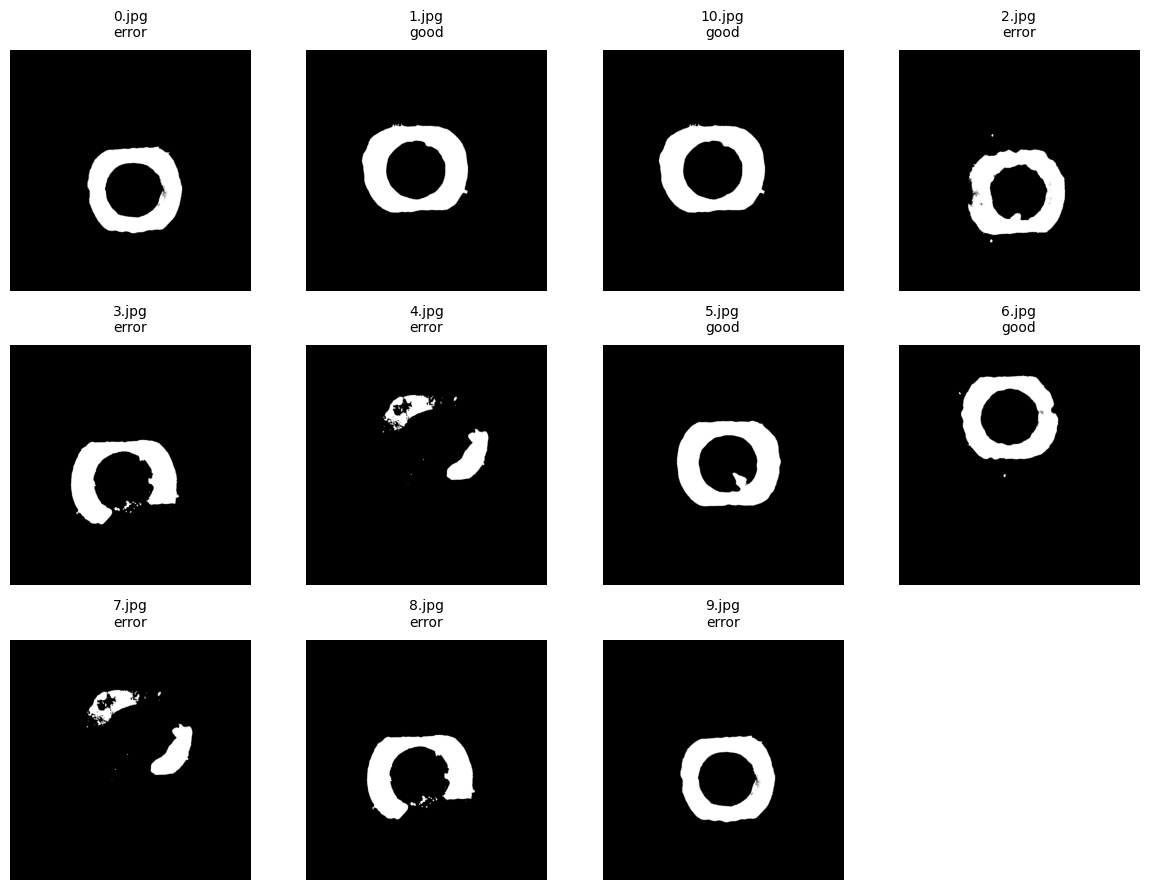

In [9]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

# --- Tham số ---
IMG_SIZE = 1280
model_path = "model1.h5"
data_test_path = "DataTest"

# --- Hàm mô phỏng điều khiển robot ---
def mocongCOM():
    print("Mở cổng COM")  # Thay bằng lệnh mở cổng thực tế nếu cần

def chayrobot(goc):
    print(f"Robot chạy tới góc {goc}")  # Thay bằng điều khiển động cơ thực tế

# --- Tải mô hình đã huấn luyện ---
model = tf.keras.models.load_model(model_path)

# --- Hàm dự đoán ảnh ---
def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    return "good" if prediction[0][0] < 0.4 else "error"

# --- Lấy danh sách ảnh ---
image_files = [f for f in os.listdir(data_test_path) if f.endswith((".jpg", ".png"))]
num_images = len(image_files)
cols = 4
rows = (num_images // cols) + (num_images % cols > 0)

plt.figure(figsize=(cols * 3, rows * 3))

# --- Duyệt qua từng ảnh ---
for i, filename in enumerate(image_files):
    file_path = os.path.join(data_test_path, filename)
    result = predict_image(file_path)

    # --- Điều khiển robot theo kết quả ---
    mocongCOM()
    if result == "good":
        chayrobot(0)
        time.sleep(1)
        chayrobot(90)
        time.sleep(1)
        chayrobot(0)
        time.sleep(1)
    else:
        chayrobot(0)
        time.sleep(1)
        chayrobot(-90)
        time.sleep(1)
        chayrobot(0)
        time.sleep(1)

    # --- Hiển thị ảnh lên grid ---
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"{filename}\n{result}", fontsize=10, pad=10)

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 458ms/step
Mở cổng COM
Robot chạy tới góc 0
Robot chạy tới góc -90
Robot chạy tới góc 0


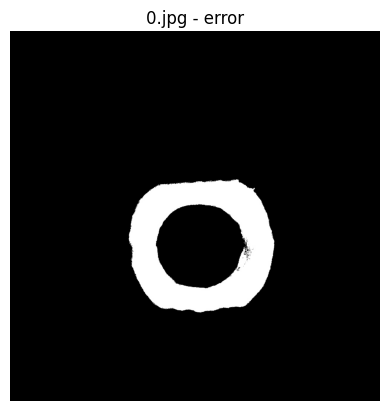

1/1 [==============================] - 0s 368ms/step
Mở cổng COM
Robot chạy tới góc 0
Robot chạy tới góc 90
Robot chạy tới góc 0


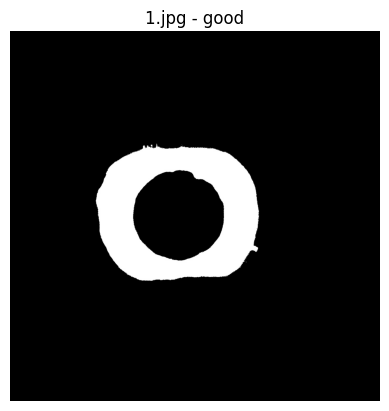

1/1 [==============================] - 0s 280ms/step
Mở cổng COM
Robot chạy tới góc 0
Robot chạy tới góc 90
Robot chạy tới góc 0


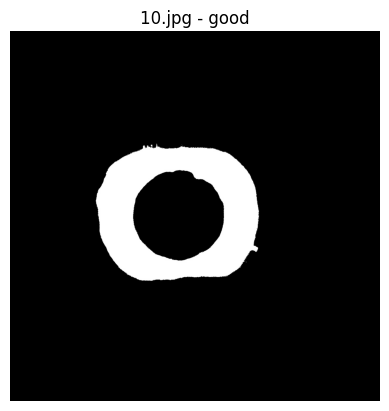

1/1 [==============================] - 0s 383ms/step
Mở cổng COM
Robot chạy tới góc 0
Robot chạy tới góc -90
Robot chạy tới góc 0


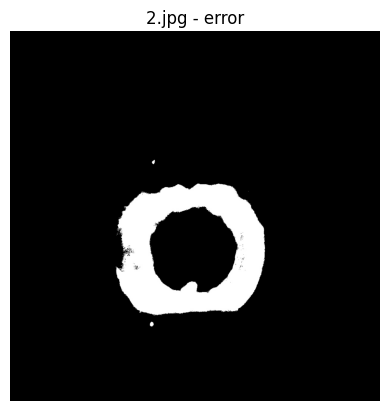

1/1 [==============================] - 0s 423ms/step
Mở cổng COM
Robot chạy tới góc 0
Robot chạy tới góc -90
Robot chạy tới góc 0


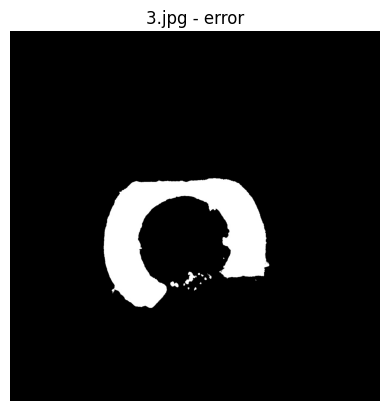

1/1 [==============================] - 0s 282ms/step
Mở cổng COM
Robot chạy tới góc 0
Robot chạy tới góc -90
Robot chạy tới góc 0


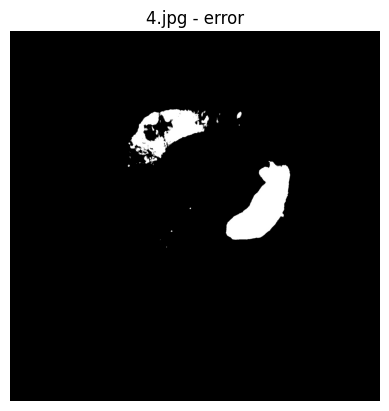

1/1 [==============================] - 0s 472ms/step
Mở cổng COM
Robot chạy tới góc 0
Robot chạy tới góc 90
Robot chạy tới góc 0


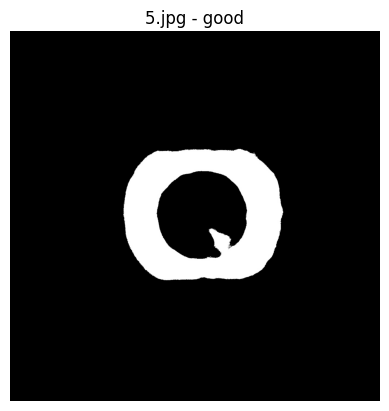

1/1 [==============================] - 0s 356ms/step
Mở cổng COM
Robot chạy tới góc 0
Robot chạy tới góc 90
Robot chạy tới góc 0


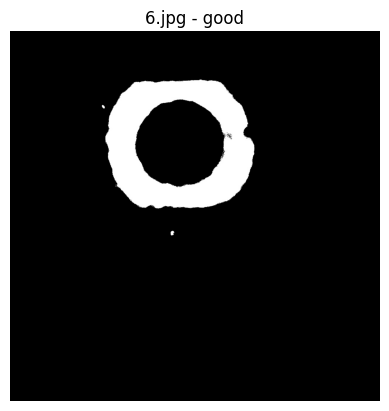

1/1 [==============================] - 0s 286ms/step
Mở cổng COM
Robot chạy tới góc 0
Robot chạy tới góc -90
Robot chạy tới góc 0


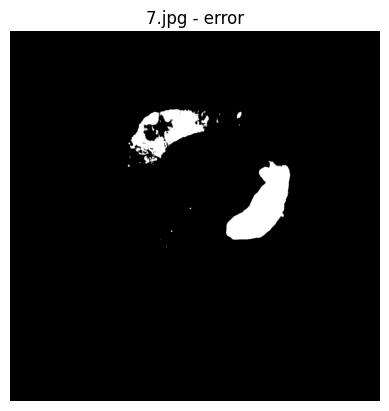

1/1 [==============================] - 0s 430ms/step
Mở cổng COM
Robot chạy tới góc 0
Robot chạy tới góc -90
Robot chạy tới góc 0


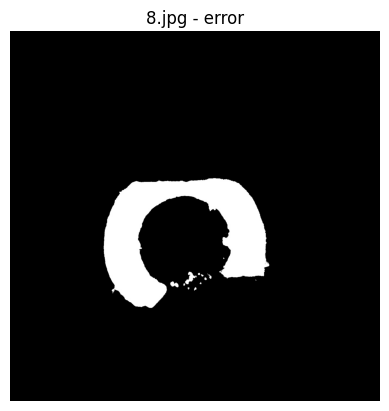

1/1 [==============================] - 0s 291ms/step
Mở cổng COM
Robot chạy tới góc 0
Robot chạy tới góc -90
Robot chạy tới góc 0


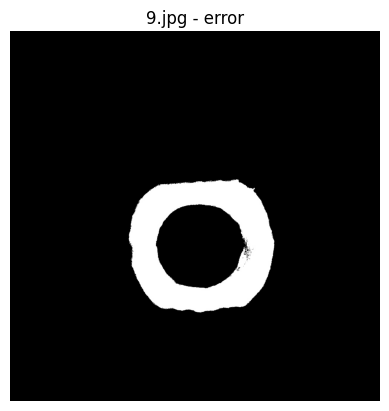

In [11]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

# --- Tham số ---
IMG_SIZE = 1280
model_path = "model1.h5"
data_test_path = "DataTest"

# --- Hàm mô phỏng điều khiển robot ---
def mocongCOM():
    print("Mở cổng COM")  # Giả lập

def chayrobot(goc):
    print(f"Robot chạy tới góc {goc}")  # Giả lập

# --- Tải mô hình ---
model = tf.keras.models.load_model(model_path)

# --- Hàm dự đoán ---
def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    return "good" if prediction[0][0] < 0.4 else "error"

# --- Lấy danh sách ảnh ---
image_files = [f for f in os.listdir(data_test_path) if f.endswith((".jpg", ".png"))]

# --- Hiển thị từng ảnh và xử lý ---
for i, filename in enumerate(image_files):
    file_path = os.path.join(data_test_path, filename)
    result = predict_image(file_path)

    # Xử lý tương ứng
    mocongCOM()
    if result == "good":
        chayrobot(0)
        time.sleep(1)
        chayrobot(90)
        time.sleep(1)
        chayrobot(0)
        time.sleep(1)
    else:
        chayrobot(0)
        time.sleep(1)
        chayrobot(-90)
        time.sleep(1)
        chayrobot(0)
        time.sleep(1)

    # Hiển thị ảnh
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(f"{filename} - {result}", fontsize=12)
    plt.axis("off")
    plt.show()
